In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [2]:
#Load the Dataset
df = pd.read_csv(r"honeyproduction.csv")
df.head()


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
#Aggregate Honey Production by Year
prod_per_year = (
    df.groupby('year')
      .totalprod
      .mean()
      .reset_index()
)

prod_per_year


,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


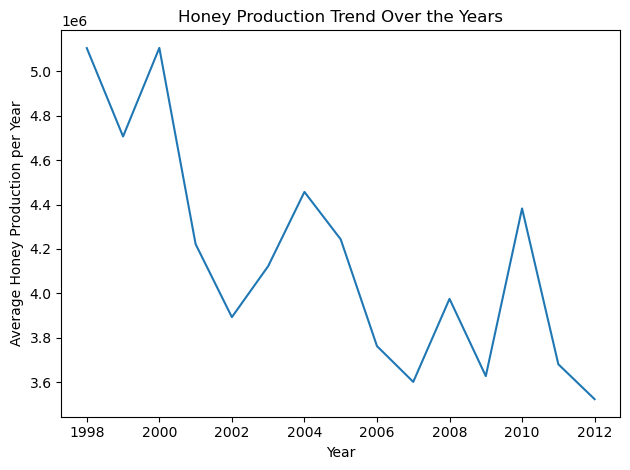

In [4]:
#Prepare Features for Linear Regression
X = prod_per_year['year'].values.reshape(-1, 1)
y = prod_per_year['totalprod']
#Visualize Historical Honey Production
plt.plot(X, y)
plt.xlabel("Year")
plt.ylabel("Average Honey Production per Year")
plt.title("Honey Production Trend Over the Years")
plt.tight_layout()
plt.show()

Slope (Coefficient): -88303.18915238194
Intercept: 181208083.1073298


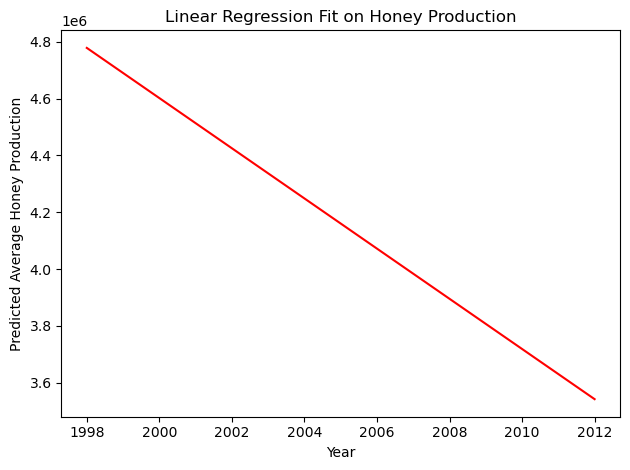

In [6]:
#Train Linear Regression Model
regr = LinearRegression()
regr.fit(X, y)
#Model Parameters
print("Slope (Coefficient):", regr.coef_[0])
print("Intercept:", regr.intercept_)
y_predict = regr.predict(X)
#Visualize Regression Fit
plt.plot(X, y_predict, color="red")
plt.xlabel("Year")
plt.ylabel("Predicted Average Honey Production")
plt.title("Linear Regression Fit on Honey Production")
plt.tight_layout()
plt.show()



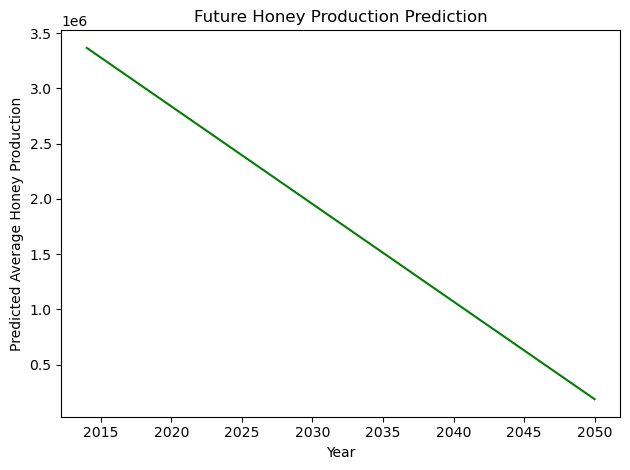

In [7]:
#Predict Future Honey Production (2014–2050)
X_future = np.array(range(2014, 2051)).reshape(-1, 1)
future_predict = regr.predict(X_future)
#Visualize Future Predictions
plt.plot(X_future, future_predict, color="green")
plt.xlabel("Year")
plt.ylabel("Predicted Average Honey Production")
plt.title("Future Honey Production Prediction")
plt.tight_layout()
plt.show()


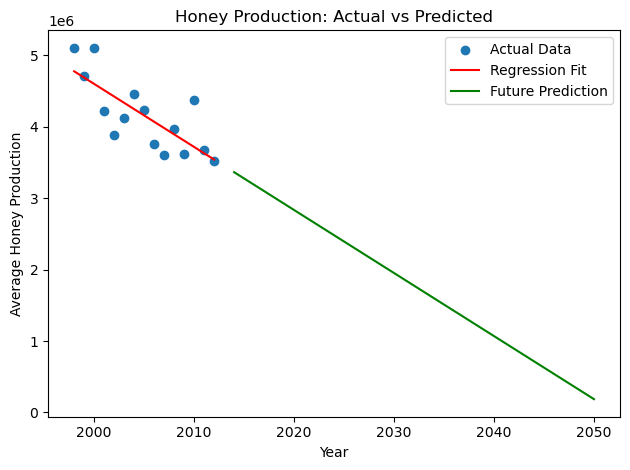

In [8]:
#Combined Visualization: Actual, Fit & Future
plt.scatter(X, y, label="Actual Data")
plt.plot(X, regr.predict(X), color="red", label="Regression Fit")
plt.plot(X_future, future_predict, color="green", label="Future Prediction")
plt.xlabel("Year")
plt.ylabel("Average Honey Production")
plt.title("Honey Production: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()